## 导入相关学习库

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# 画图设置
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## 产生学习数据

用[scikit-learn](http://scikit-learn.org/)  产生数据.使用 [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) 函数.

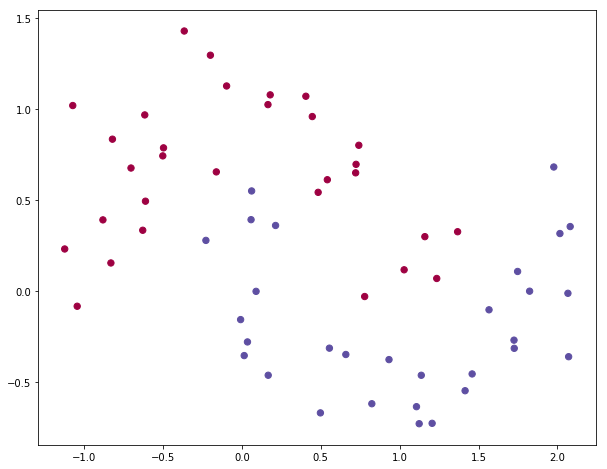

In [2]:
# 产生数据、画图
np.random.seed(0)
X, y = sklearn.datasets.make_moons(60, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

尝试使用神经网络进行分类

## 一个逻辑回归的例子

直接使用`scikit-learn`包.

In [3]:
# 进行训练
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [4]:
# 集合画图
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # 画图
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # 预测
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 数据
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

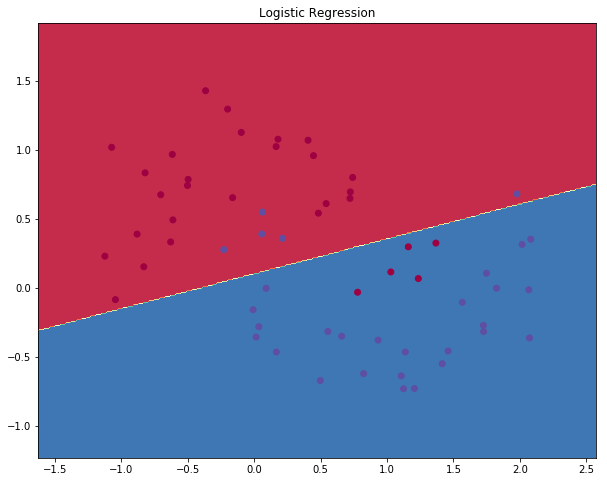

In [5]:
# 决策边界
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("逻辑回归")

逻辑回归的结果

### 3层神经网络,数据点只有两维坐标, 输出给出0或者1的概率

<img src='./nn-3-layer-network.png' style='width: 50%'/>

设置简单的网络参数，隐藏层的维度小一点，选择s激活函数，tanh，计算权重和偏置

## 进行训练


In [6]:
num_examples = len(X) # 样本大小
nn_input_dim = 2 # 输入维度
nn_output_dim = 2 # 输出维度

# 梯度下降
epsilon = 0.01 # 学习速率
reg_lambda = 0.01 # 回归强度

In [7]:
# 损失函数
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # 计算
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # 损失函数
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [8]:
# 输出
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [9]:
# 对参数进行学习.
# - nn_hdim:隐藏层节点数

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # 随机初始化
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # 最终模型
    model = {}
    
    # 梯度下降.
    for i in range(0, num_passes):

        # 计算
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # 返回调整
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # 更新
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
      
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        #j简单输出
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

## 设置隐藏层3个神经元



Loss after iteration 0: 0.519256
Loss after iteration 1000: 0.022254
Loss after iteration 2000: 0.018372
Loss after iteration 3000: 0.017862
Loss after iteration 4000: 0.017734
Loss after iteration 5000: 0.017688
Loss after iteration 6000: 0.017665
Loss after iteration 7000: 0.017652
Loss after iteration 8000: 0.017643
Loss after iteration 9000: 0.017637
Loss after iteration 10000: 0.017633
Loss after iteration 11000: 0.017630
Loss after iteration 12000: 0.017628
Loss after iteration 13000: 0.017627
Loss after iteration 14000: 0.017626
Loss after iteration 15000: 0.017625
Loss after iteration 16000: 0.017624
Loss after iteration 17000: 0.017624
Loss after iteration 18000: 0.017623
Loss after iteration 19000: 0.017623


Text(0.5,1,'Decision Boundary for hidden layer size 3')

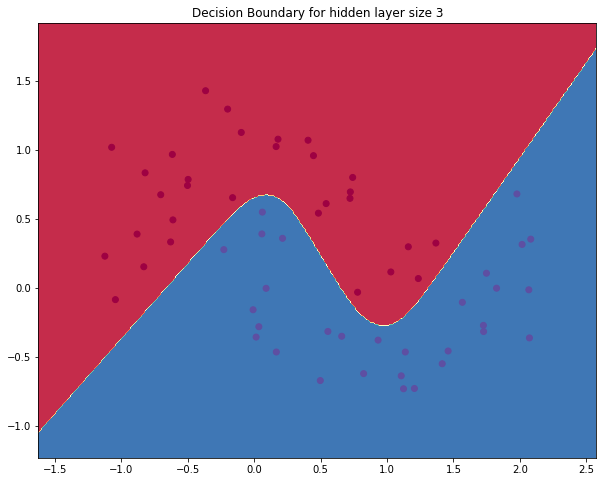

In [10]:

model = build_model(3, print_loss=True)

plot_decision_boundary(lambda x: predict(model, x))
plt.title("隐藏层3个神经元给出的决策边界")

# 改变隐藏层大小



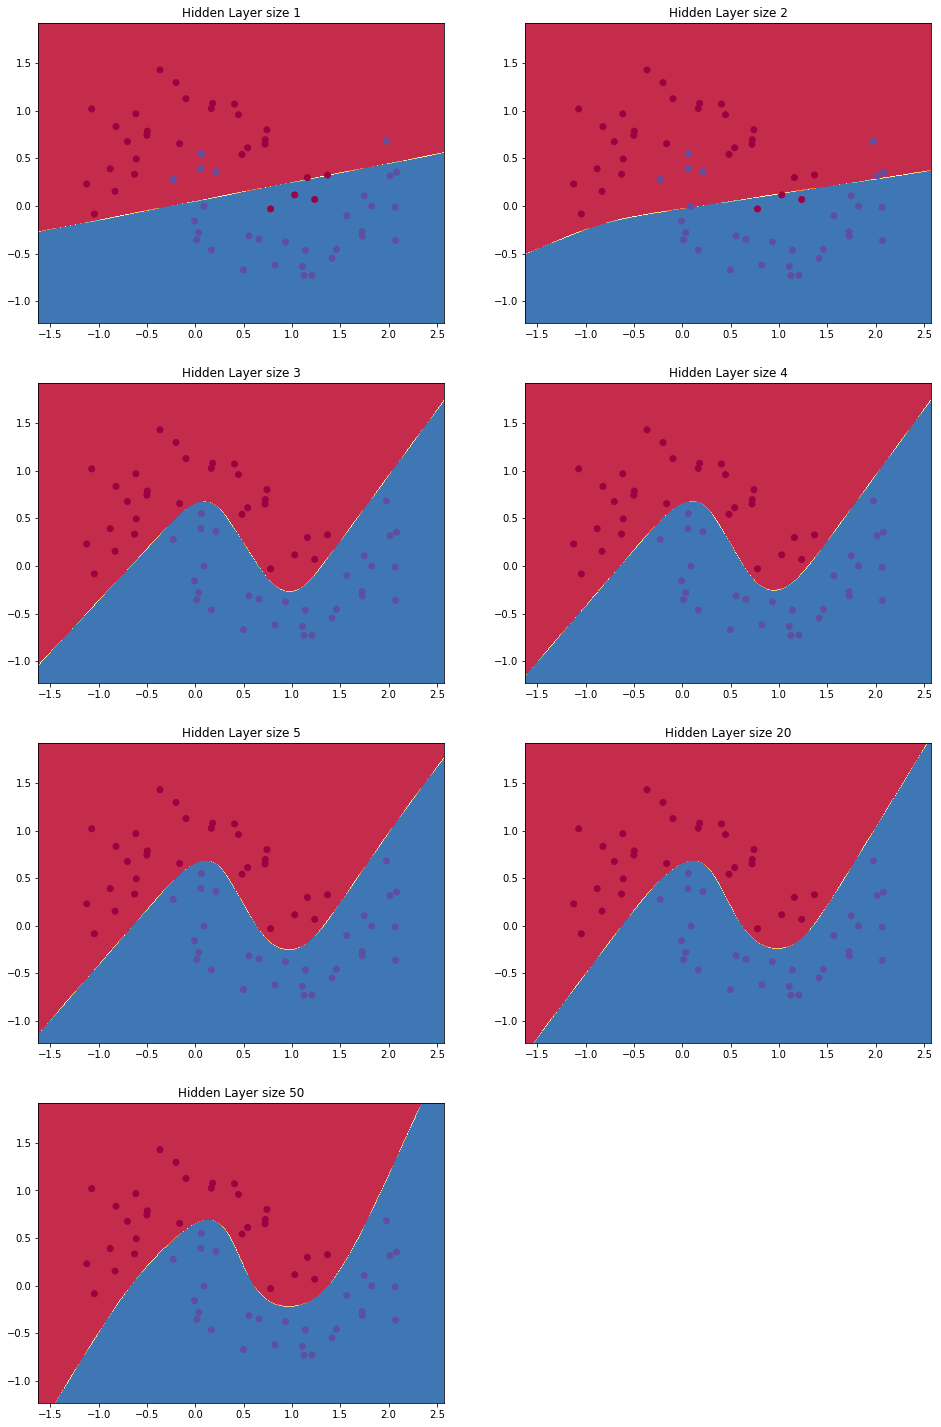

In [11]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('隐藏层大小为 %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()